TODO update literature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vanet_tools as vp
from scipy.spatial import distance
from collections import defaultdict

In [5]:
box_sumo = pd.read_csv('pasubio.csv',delimiter=';').dropna()

In [6]:
len(set(box_sumo['vehicle_id']))

8776

In [8]:
box_sumo['timestep_time'].max()

4604.0

In [9]:
coordinates = box_sumo[['vehicle_x','vehicle_y']]

In [11]:
new_micro_clouds =vp.create_coords(coordinates,300,10)

In [12]:
time_col = box_sumo['timestep_time']
start,end = int(time_col.min()), int(time_col.max())


In [13]:
time_steps= box_sumo.groupby('timestep_time')
time_steps.get_group(1).iterrows()
    

<generator object DataFrame.iterrows at 0x7f912c6f9780>

Paremeters that must be established, mininum amount of trafic for microcloud, relation of power to number of cars

In [14]:
min_cars=3
compute_per_car=1
microcloud_range=300

In [15]:
def determine_closest(micro_clouds,x,y):
    min_distance = float('inf')
    index_of_closest = -1
    for index,micro_cloud in enumerate(micro_clouds):
        x_coord,y_coord =  micro_cloud
        current_distance = distance.euclidean((x,y),(x_coord,y_coord))
        if current_distance<min_distance:
            min_distance = current_distance
            index_of_closest = index
    return index_of_closest
            

In [16]:
cloud_to_power = defaultdict(list)
for time in range(start,end+1):
    time_step = time_steps.get_group(time)
    current_power = [0 for _ in range(len(micro_clouds))]
    for index, row in time_step.iterrows():
        x,y = row['vehicle_x'],row['vehicle_y']
        index_of_closest =determine_closest(micro_clouds,x,y)
        closest = micro_clouds[index_of_closest]
        if distance.euclidean((closest[0],closest[1]),(x,y))<microcloud_range:
            current_power[index_of_closest]+=1
    for index,power in enumerate(current_power):
        cloud_to_power[index].append(power)
            

NameError: name 'micro_clouds' is not defined

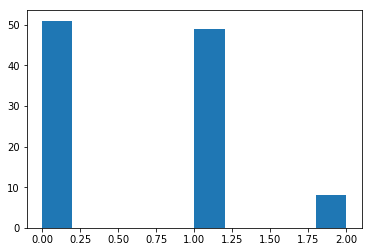

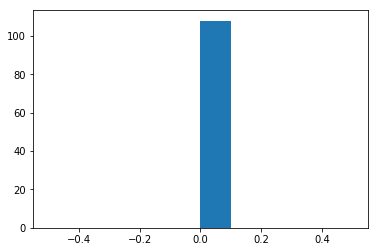

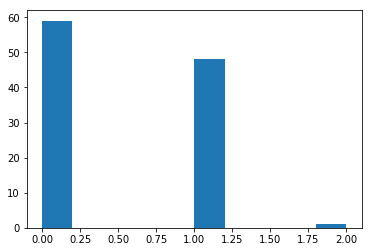

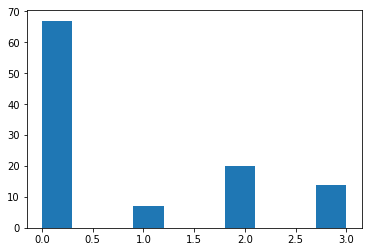

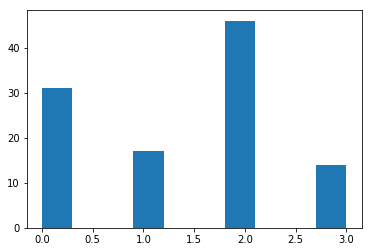

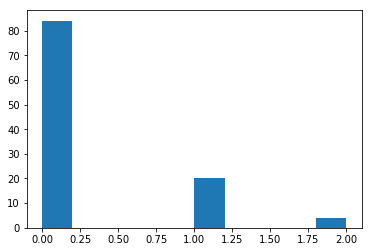

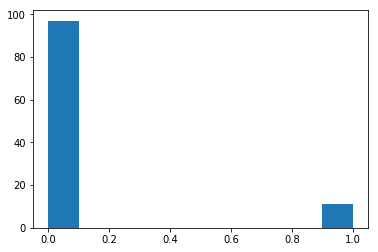

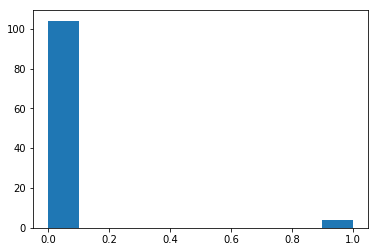

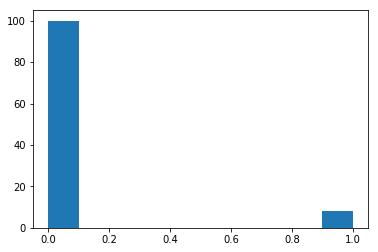

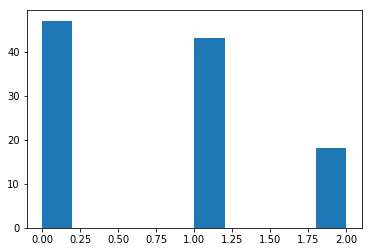

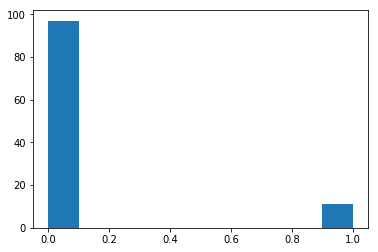

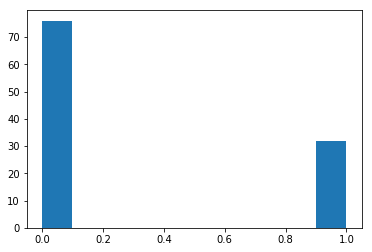

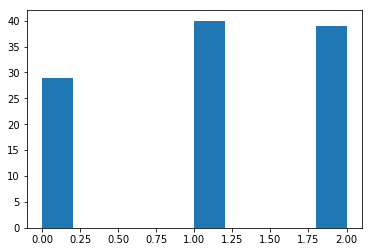

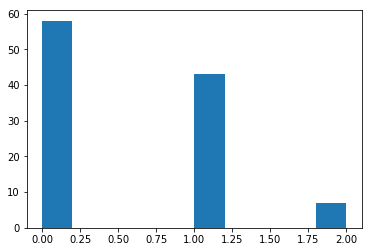

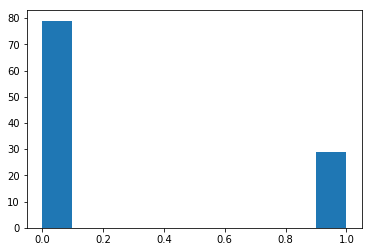

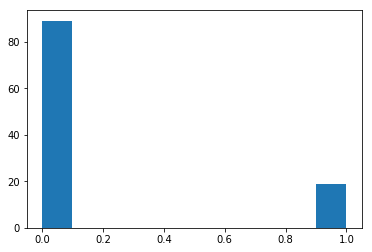

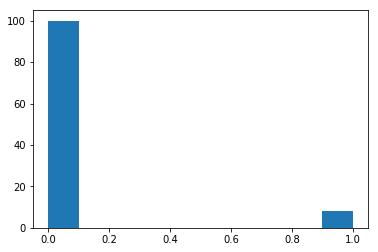

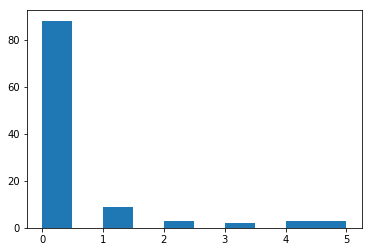

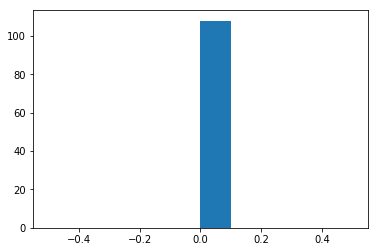

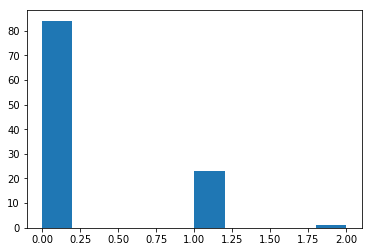

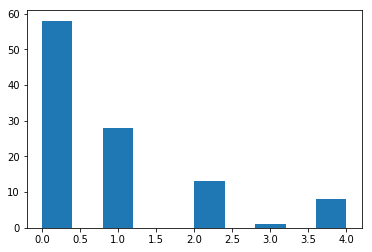

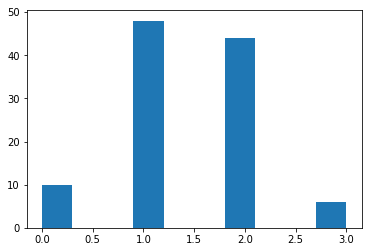

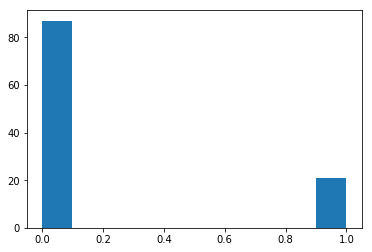

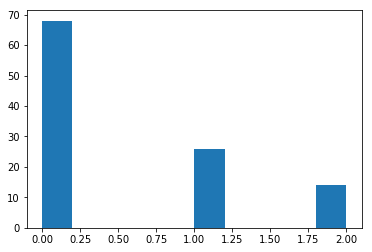

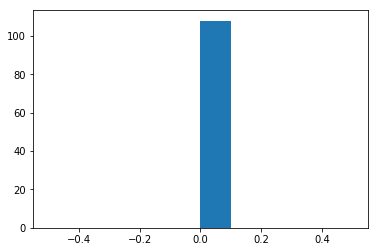

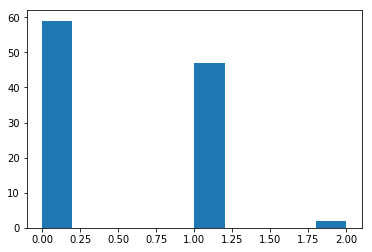

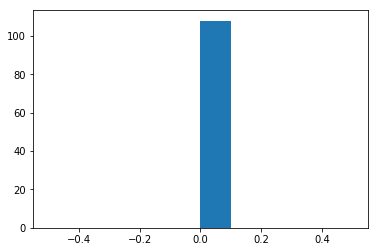

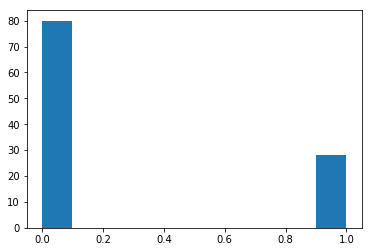

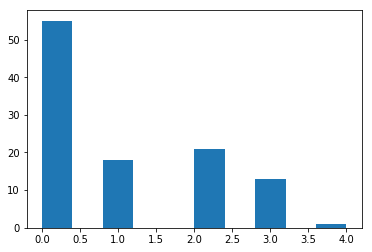

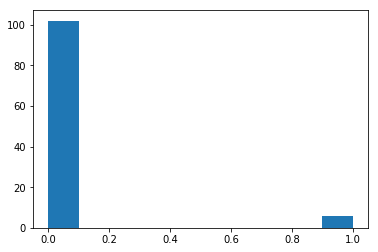

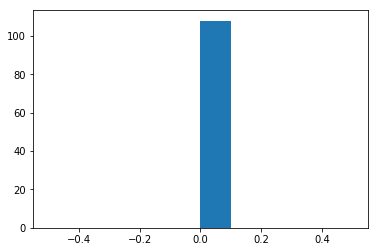

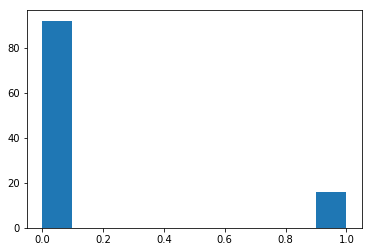

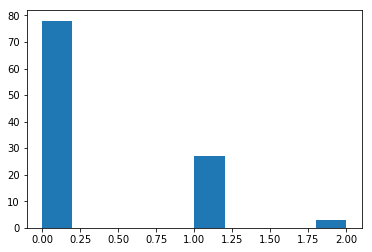

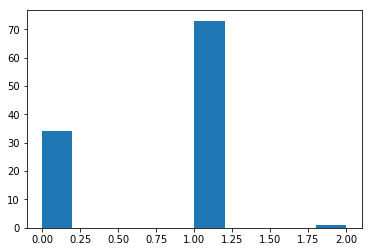

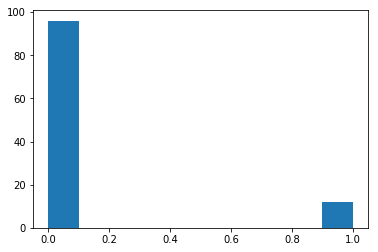

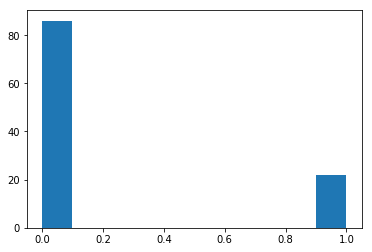

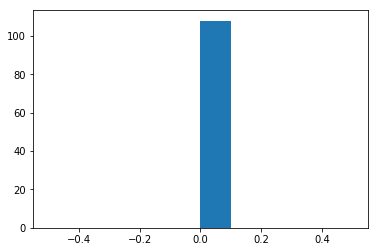

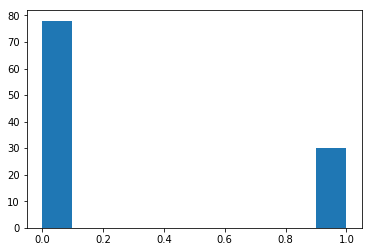

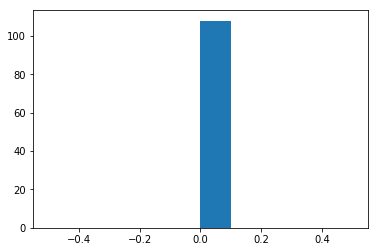

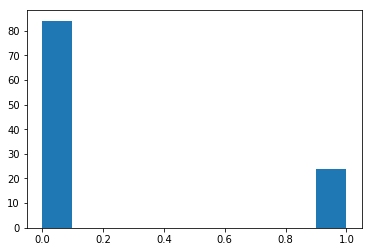

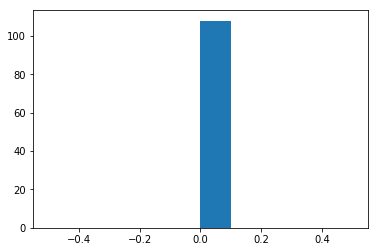

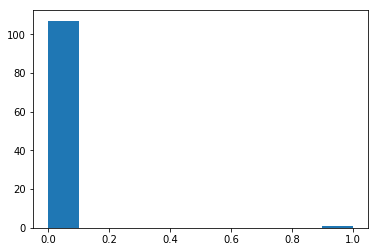

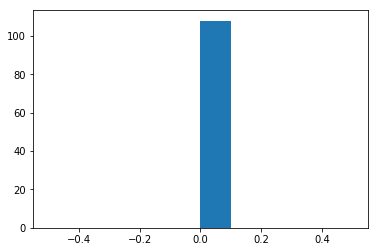

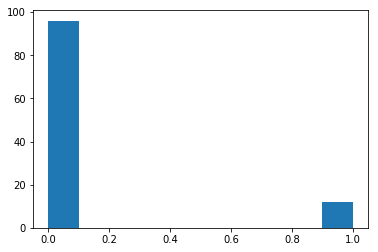

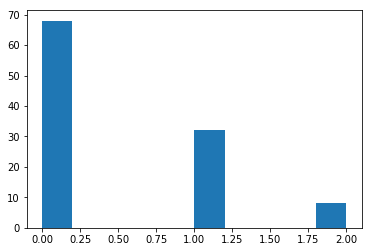

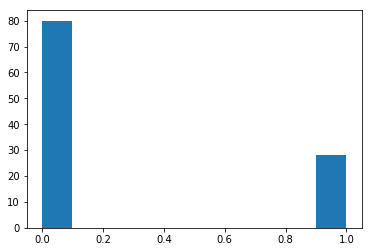

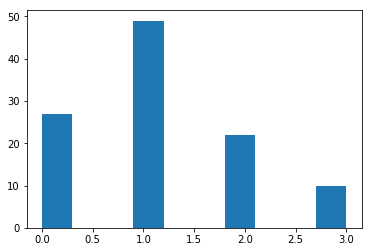

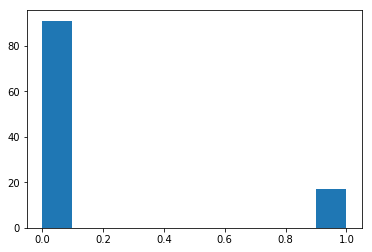

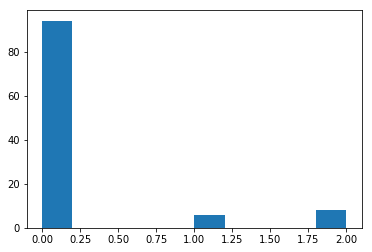

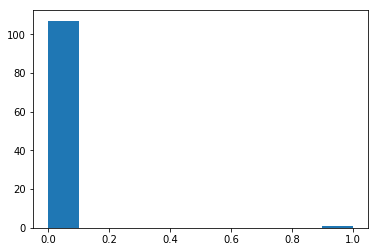

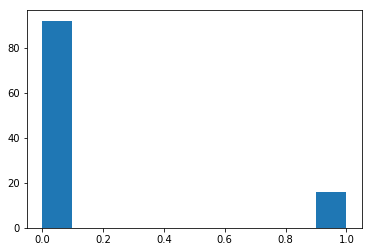

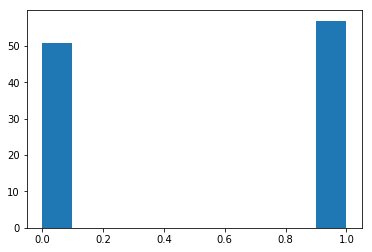

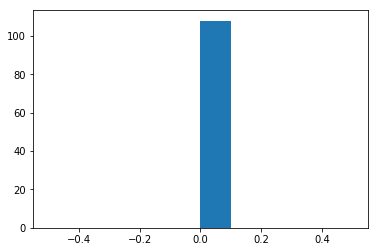

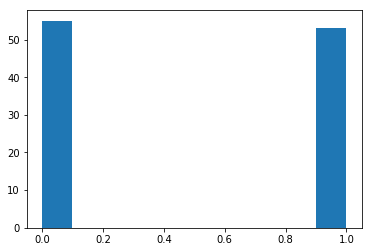

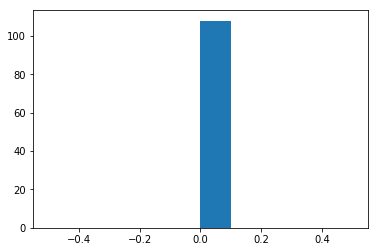

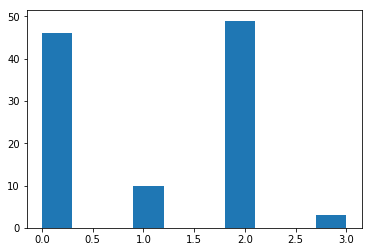

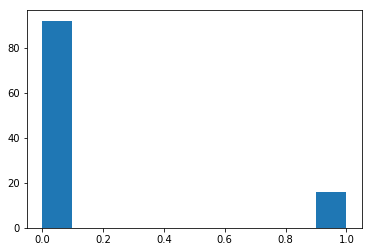

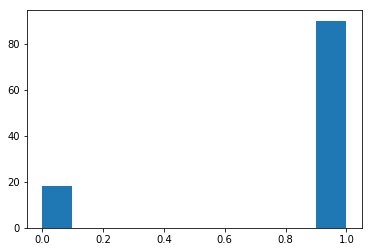

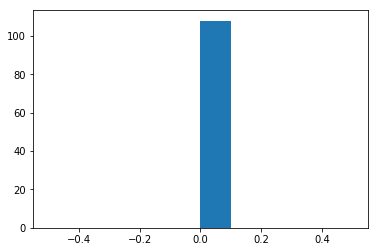

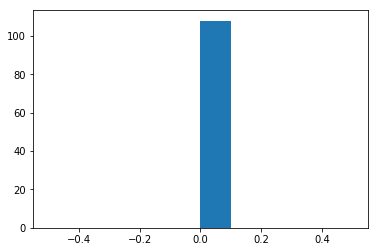

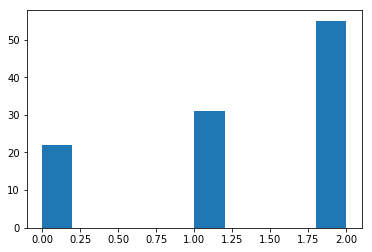

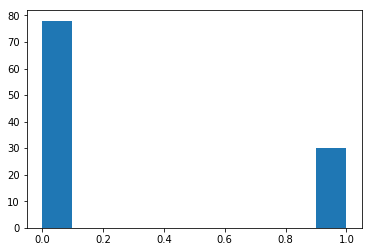

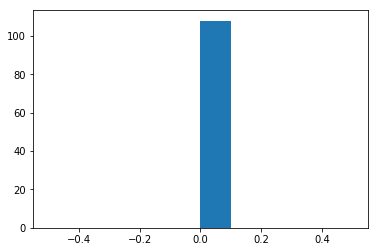

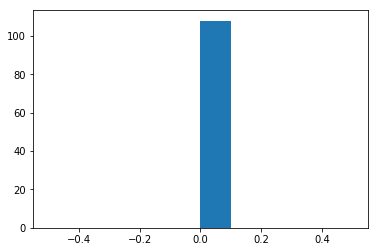

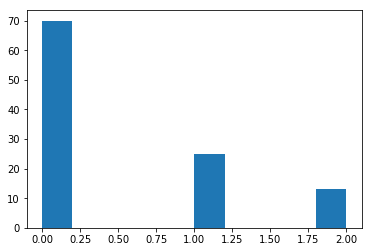

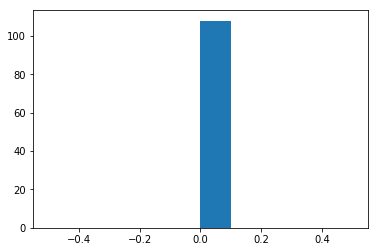

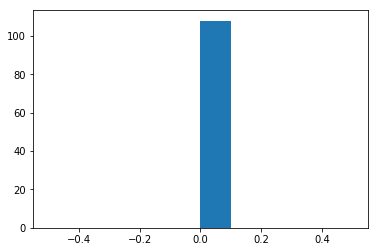

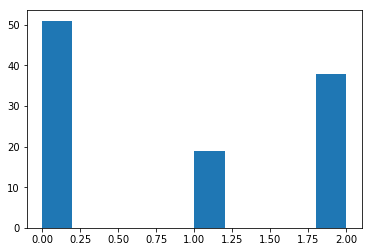

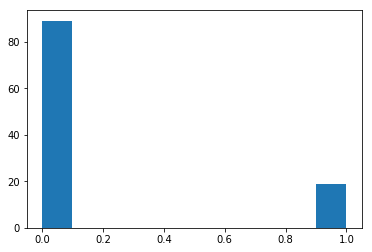

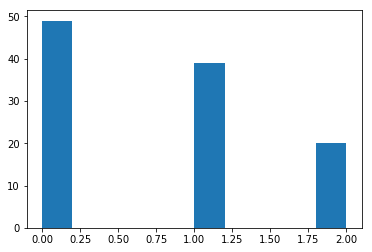

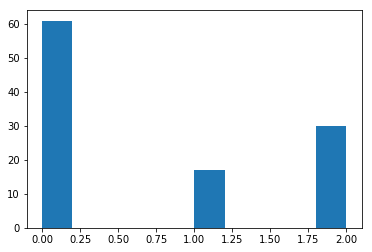

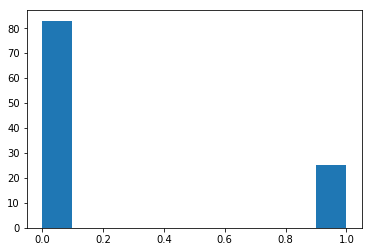

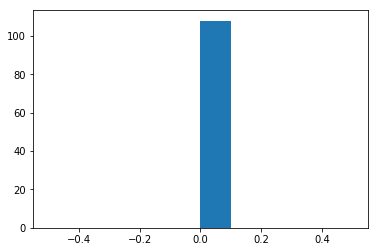

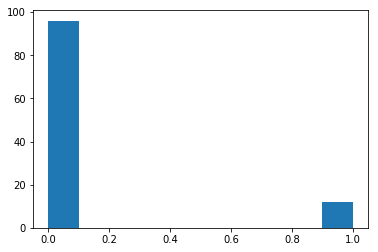

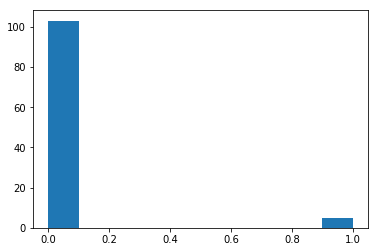

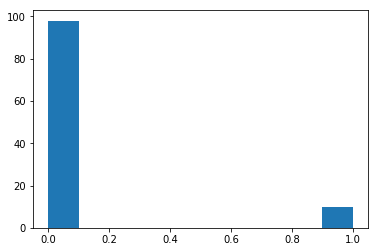

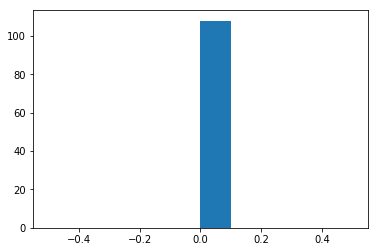

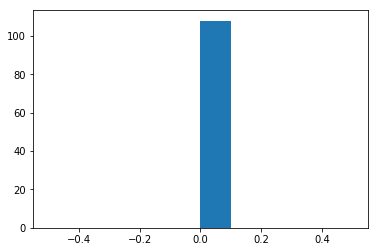

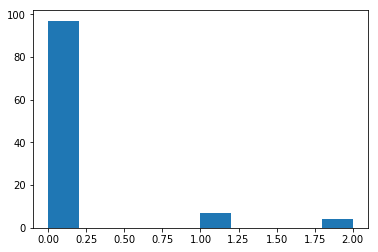

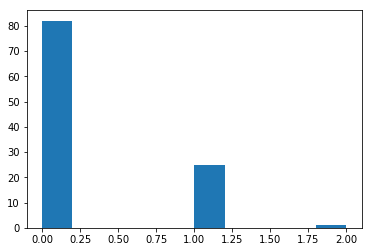

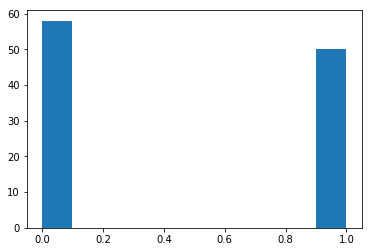

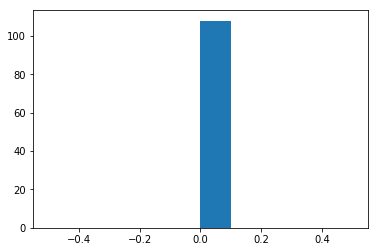

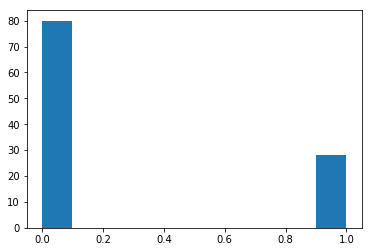

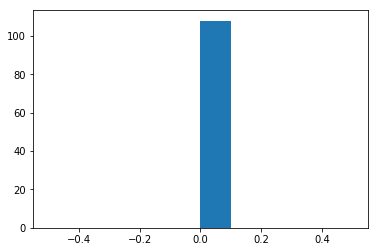

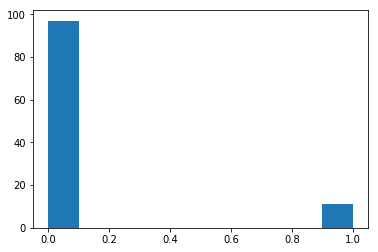

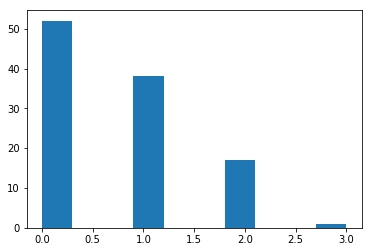

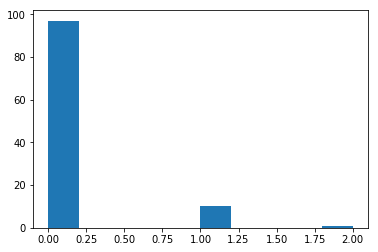

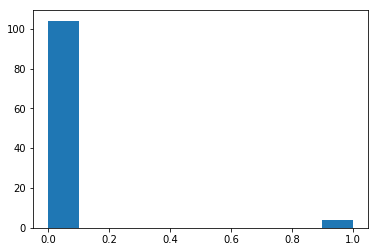

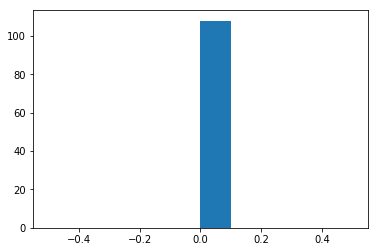

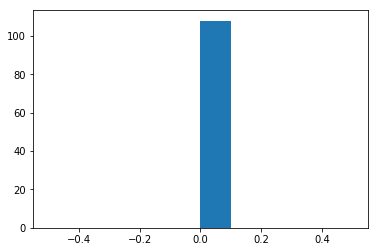

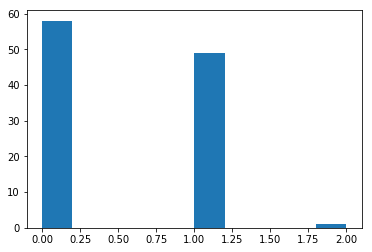

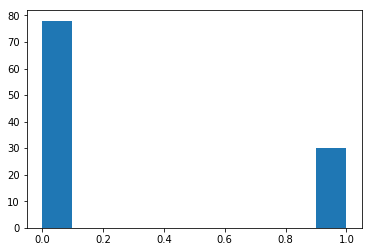

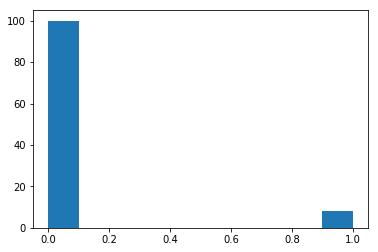

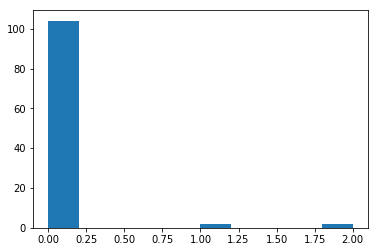

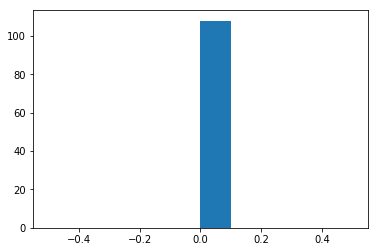

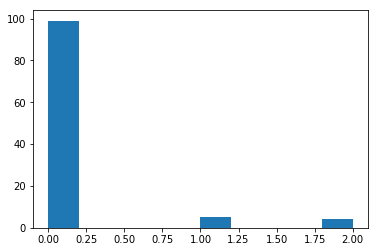

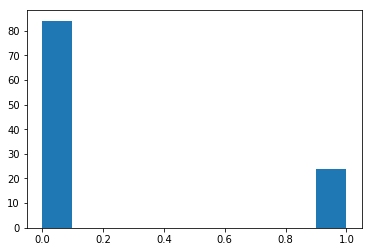

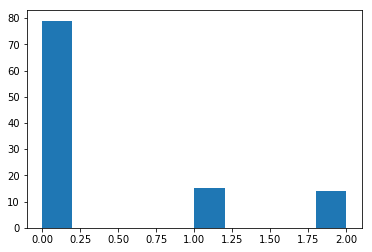

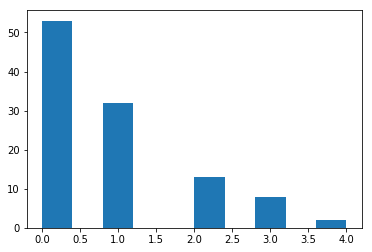

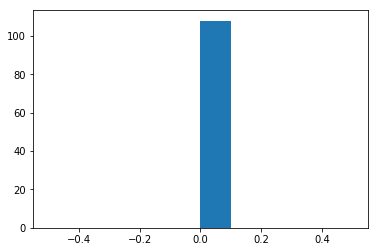

In [144]:
for i in range(len(micro_clouds)):
    plt.hist(cloud_to_power[i])
    plt.show()

In [17]:
cloud_to_power = defaultdict(list)
for time in range(start,end+1):
    time_step = time_steps.get_group(time)
    current_power = [0 for _ in range(len(new_micro_clouds))]
    for index, row in time_step.iterrows():
        x,y = row['vehicle_x'],row['vehicle_y']
        index_of_closest =determine_closest(new_micro_clouds,x,y)
        closest = new_micro_clouds[index_of_closest]
        if distance.euclidean((closest[0],closest[1]),(x,y))<microcloud_range:
            current_power[index_of_closest]+=1
    for index,power in enumerate(current_power):
        cloud_to_power[index].append(power)
            

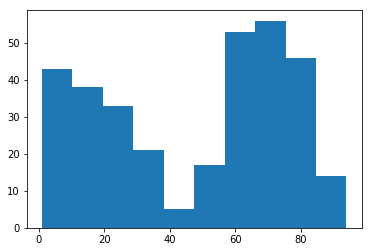

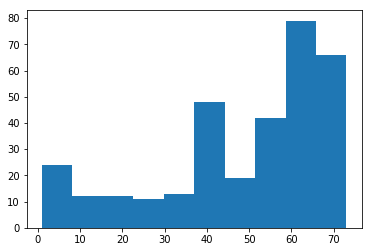

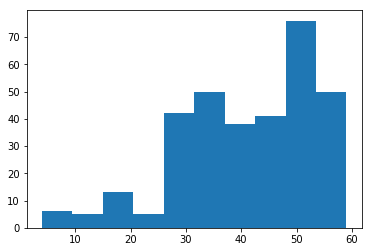

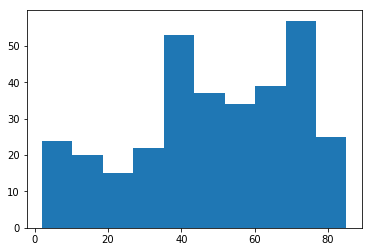

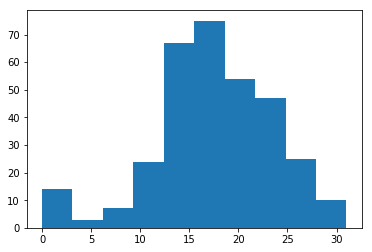

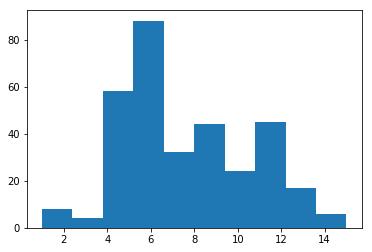

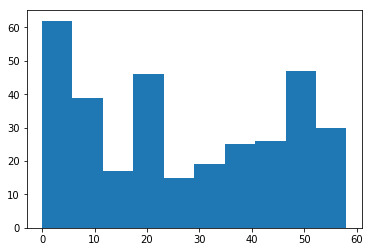

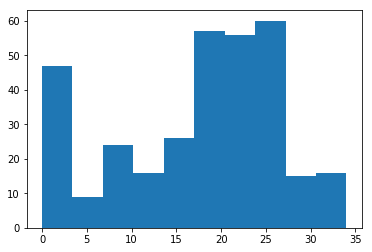

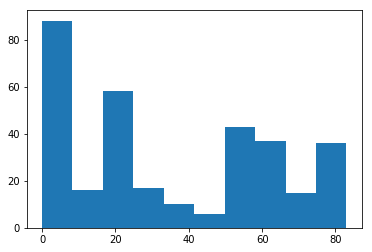

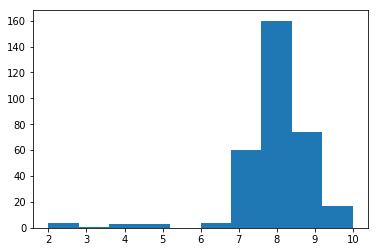

In [18]:
for i in range(len(new_micro_clouds)):
    plt.hist(cloud_to_power[i])
    plt.show()